# 03__CRISPhieRmix

in this notebook, i run CRISPhieRmix on the filtered sgRNA log2 fold changes

In [1]:
#install.packages("devtools")

In [2]:
#devtools::install_github("timydaley/CRISPhieRmix")

In [3]:
library(CRISPhieRmix)

## 1. import data, get variables needed

In [4]:
data_f = "../../../data/02__screen/02__enrichment_data/data_filt.with_batch.tmp"

In [5]:
data <- read.table(data_f, sep="\t", header=TRUE)
head(data)

,sgRNA,ctrl_status,gene_id,gene_name,transcript_id,transcript_name,transcript_biotype_status,tss_chr_hg38,tss_start_hg38,tss_strand_hg38,⋯,padj_diff,baseMean_dz,raw_l2fc_dz,l2fc_dz,l2fcSE_dz,stat_dz,pvalue_dz,padj_dz,sgRNA_filt,group_id_rd
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,GGGAAGTGAGATGACGGTCG,experimental,ENSG00000224616.1_1,RTCA-AS1,ENST00000421185.1_1,RTCA-AS1-001,promoter_overlap,chr1,100266115,-,⋯,0.9420532,1819.6600,-0.101521199,0.11530071,0.1572539,-0.6455880,0.5185462,0.8215361,8,RTCA-AS1-001;;;NC_000001.11:-:100266115;;;experimental;;;promoter_overlap;;;8
2,GGAAGTGAGATGACGGTCGC,experimental,ENSG00000224616.1_1,RTCA-AS1,ENST00000421185.1_1,RTCA-AS1-001,promoter_overlap,chr1,100266115,-,⋯,0.7641593,1860.5120,-0.009594832,0.01103721,0.1604283,-0.0598076,0.9523089,0.9872230,8,RTCA-AS1-001;;;NC_000001.11:-:100266115;;;experimental;;;promoter_overlap;;;8
3,GAAGTGAGATGACGGTCGCG,experimental,ENSG00000224616.1_1,RTCA-AS1,ENST00000421185.1_1,RTCA-AS1-001,promoter_overlap,chr1,100266115,-,⋯,0.9606568,1276.1564,0.148680234,-0.17798390,0.1827426,0.8136045,0.4158715,0.7631130,8,RTCA-AS1-001;;;NC_000001.11:-:100266115;;;experimental;;;promoter_overlap;;;8
4,CCCTGAAAAACTTGTGCCCT,experimental,ENSG00000224616.1_1,RTCA-AS1,ENST00000421185.1_1,RTCA-AS1-001,promoter_overlap,chr1,100266115,-,⋯,0.7165734,3147.4102,0.077057584,-0.08324473,0.1270343,0.6065887,0.5441239,0.8312478,8,RTCA-AS1-001;;;NC_000001.11:-:100266115;;;experimental;;;promoter_overlap;;;8
5,CTGCCGGGGAAGTGAGATGA,experimental,ENSG00000224616.1_1,RTCA-AS1,ENST00000421185.1_1,RTCA-AS1-001,promoter_overlap,chr1,100266115,-,⋯,0.8139329,1264.3644,-0.194711787,0.23184131,0.1773541,-1.0978701,0.2722612,0.6551618,8,RTCA-AS1-001;;;NC_000001.11:-:100266115;;;experimental;;;promoter_overlap;;;8
6,GCCCTGAAAAACTTGTGCCC,experimental,ENSG00000224616.1_1,RTCA-AS1,ENST00000421185.1_1,RTCA-AS1-001,promoter_overlap,chr1,100266115,-,⋯,0.9338354,911.7831,-0.164146930,0.20738000,0.2008389,-0.8173065,0.4137533,0.7614742,8,RTCA-AS1-001;;;NC_000001.11:-:100266115;;;experimental;;;promoter_overlap;;;8


In [6]:
names(data)

[1] "sgRNA"                     "ctrl_status"              
 [3] "gene_id"                   "gene_name"                
 [5] "transcript_id"             "transcript_name"          
 [7] "transcript_biotype_status" "tss_chr_hg38"             
 [9] "tss_start_hg38"            "tss_strand_hg38"          
[11] "tss_type"                  "tss_id_hg38"              
[13] "sgRNA_id"                  "DZ_Rep1__counts"          
[15] "DZ_Rep2__counts"           "Pos_Rep1__counts"         
[17] "Pos_Rep2__counts"          "Neg_Rep1__counts"         
[19] "Neg_Rep2__counts"          "DZ_Rep1__cpm"             
[21] "DZ_Rep2__cpm"              "Pos_Rep1__cpm"            
[23] "Pos_Rep2__cpm"             "Neg_Rep1__cpm"            
[25] "Neg_Rep2__cpm"             "scramble_id"              
[27] "group_id"                  "baseMean_diff"            
[29] "raw_l2fc_diff"             "l2fc_diff"                
[31] "l2fcSE_diff"               "stat_diff"                
[33] "pvalue_diff"               "padj_diff"                
[35] "baseMean_dz"               "raw_l2fc_dz"              
[37] "l2fc_dz"                   "l2fcSE_dz"                
[39] "stat_dz"                   "pvalue_dz"                
[41] "padj_dz"                   "sgRNA_filt"               
[43] "group_id_rd"

### first use CRISPhieRmix to calculate gene scores for undiff/diff (differentiation-related)

In [7]:
# x needs to be the l2fcs of target genes
tgts <- data[which(data$ctrl_status != "scramble"), ]
x <- tgts$l2fc_diff

head(x)

[1]  0.1428848  0.5099787 -0.3911684  0.2822630  0.5622384 -0.3188184

In [8]:
# geneIds needs to be the geneIds associated with x
geneIds <- tgts$group_id_rd
head(geneIds)

[1] "RTCA-AS1-001;;;NC_000001.11:-:100266115;;;experimental;;;promoter_overlap;;;8"
[2] "RTCA-AS1-001;;;NC_000001.11:-:100266115;;;experimental;;;promoter_overlap;;;8"
[3] "RTCA-AS1-001;;;NC_000001.11:-:100266115;;;experimental;;;promoter_overlap;;;8"
[4] "RTCA-AS1-001;;;NC_000001.11:-:100266115;;;experimental;;;promoter_overlap;;;8"
[5] "RTCA-AS1-001;;;NC_000001.11:-:100266115;;;experimental;;;promoter_overlap;;;8"
[6] "RTCA-AS1-001;;;NC_000001.11:-:100266115;;;experimental;;;promoter_overlap;;;8"

In [9]:
# negCtrl needs to be the l2fcs of scrambles
negs <- data[which(data$ctrl_status == "scramble"), ]
negCtrl <- negs$l2fc_diff

head(negCtrl)

[1]  2.0186260 -0.5849112  0.1396345  1.0741742 -0.5996559 -0.5537270

fit negative control distributions 
2 groups 
converged 
mu =  2.718923 
sigma =  2.194188 
pq =  0.003520471 


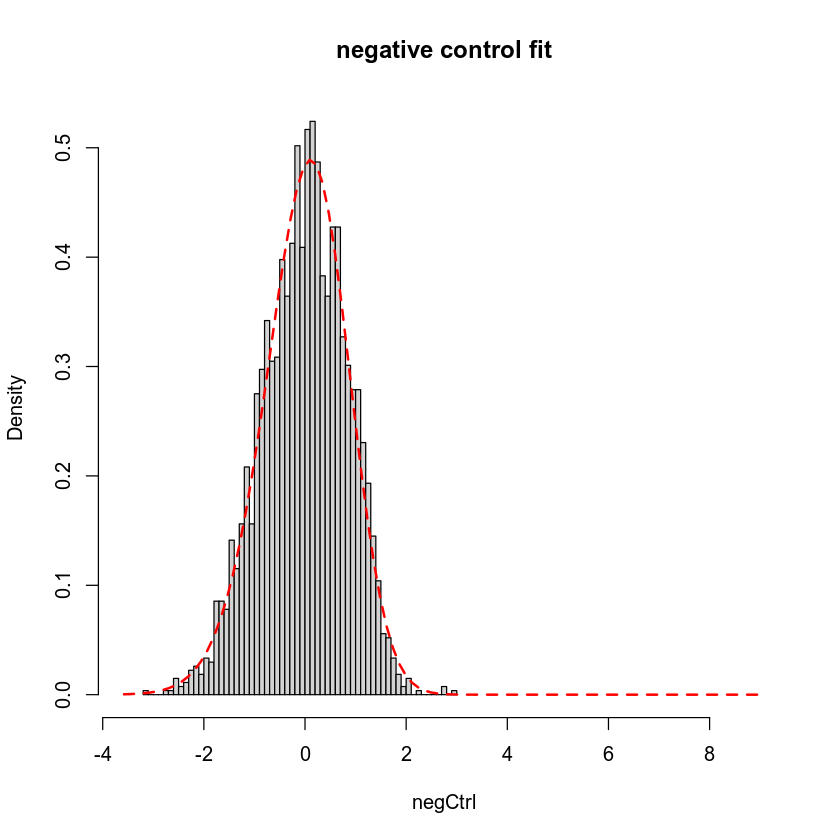

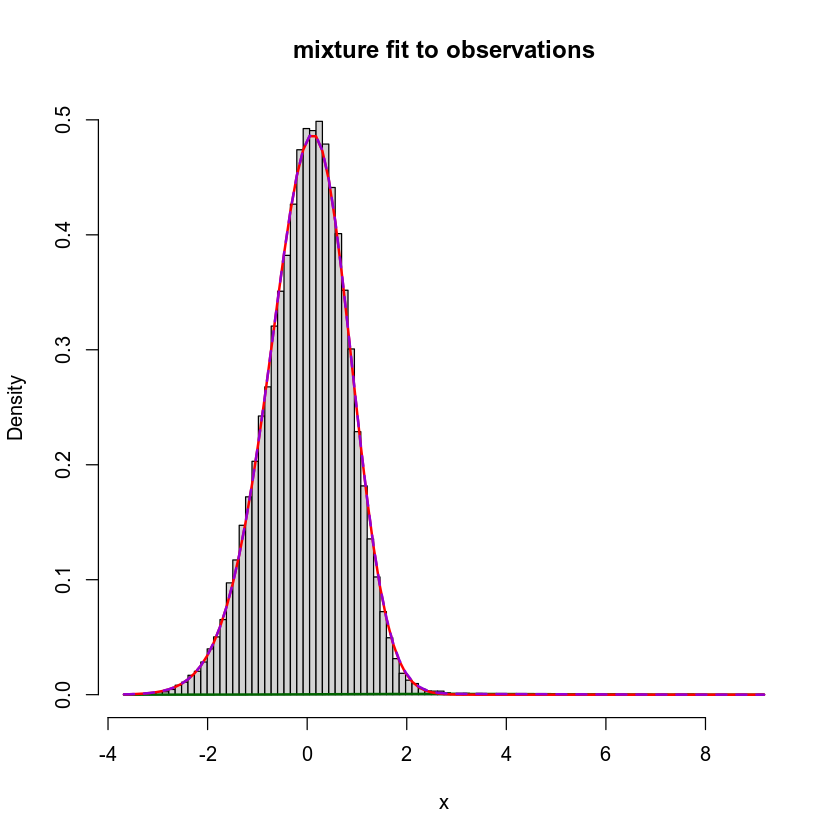

In [10]:
l2fc_diff.CRISPhieRmix <- CRISPhieRmix(x = x, geneIds = geneIds, negCtrl = negCtrl,
                                       VERBOSE = TRUE, PLOT = TRUE)

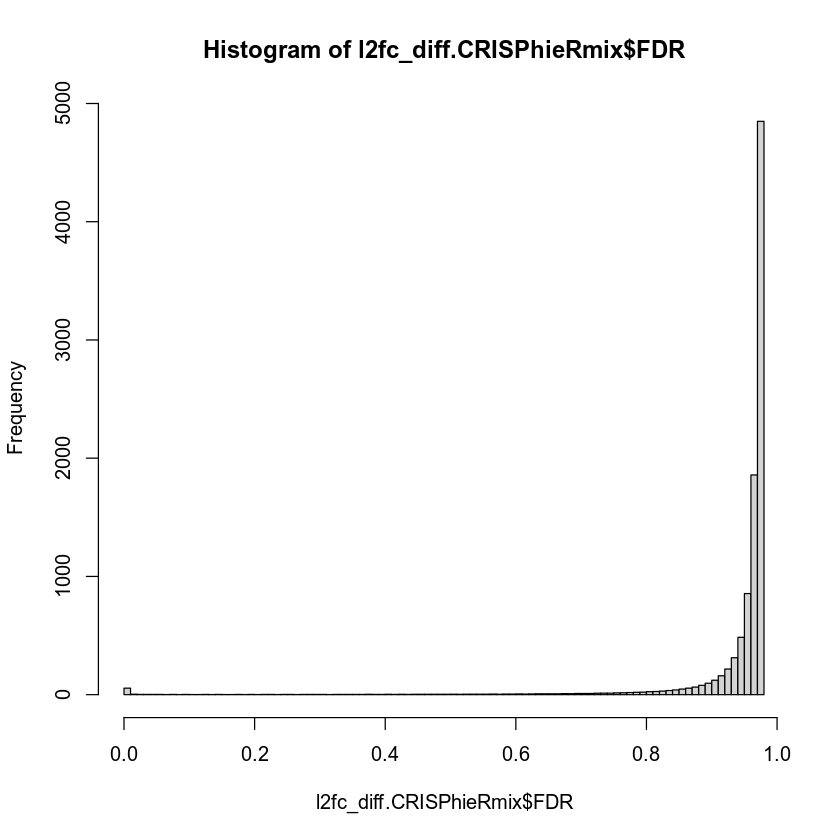

In [11]:
hist(l2fc_diff.CRISPhieRmix$FDR, breaks = 100)

In [12]:
sum(l2fc_diff.CRISPhieRmix$FDR < 0.1)

[1] 73

In [13]:
sum(l2fc_diff.CRISPhieRmix$FDR < 0.05)

[1] 65

In [14]:
scores_diff <- data.frame(groups = l2fc_diff.CRISPhieRmix$genes, FDR = l2fc_diff.CRISPhieRmix$FDR)
head(scores_diff[order(scores_diff$FDR, decreasing = FALSE), ], 10)

,groups,FDR
,<chr>,<dbl>
677,"[RP11-120D5.1-005, RP11-120D5.1-004];;;NC_000023.11:-:11111137;;;experimental;;;promoter_overlap;;;7",0.000000e+00
3278,EOMES-001;;;NC_000003.12:-:27722322;;;control;;;protein_coding;;;6,0.000000e+00
3279,EOMES-004;;;NC_000003.12:-:27722707;;;control;;;protein_coding;;;6,0.000000e+00
3554,HOXC-AS1-002;;;NC_000012.12:-:53999649;;;experimental;;;promoter_overlap;;;8,0.000000e+00
5205,RP11-121L10.2-001;;;NC_000011.10:+:90223166;;;experimental;;;promoter_overlap;;;8,0.000000e+00
8979,RP4-621N11.2-001;;;NC_000020.11:+:37095770;;;experimental;;;promoter_overlap;;;5,0.000000e+00
9359,SMARCA4-014;;;NC_000019.10:+:11060127;;;mRNA;;;protein_coding;;;6,0.000000e+00
9415,SOX17-001;;;NC_000008.11:+:54457934;;;control;;;protein_coding;;;7,0.000000e+00
9465,STC2-001;;;NC_000005.10:-:173329499;;;mRNA;;;protein_coding;;;6,3.700743e-17


In [15]:
sig_diff <- scores_diff[which(scores_diff$FDR < 0.1), ]
nrow(sig_diff)

[1] 73

In [16]:
sig_diff[grep("control", sig_diff$groups), ]

,groups,FDR
,<chr>,<dbl>
3278,EOMES-001;;;NC_000003.12:-:27722322;;;control;;;protein_coding;;;6,0.000000e+00
3279,EOMES-004;;;NC_000003.12:-:27722707;;;control;;;protein_coding;;;6,0.000000e+00
3378,FOXA2-002;;;NC_000020.11:-:22584571;;;control;;;protein_coding;;;9,1.132523e-10
3416,GATA6-001;;;NC_000018.10:+:22169434;;;control;;;protein_coding;;;7,4.454609e-05
3464,GSC-001;;;NC_000014.9:-:94770237;;;control;;;protein_coding;;;3,2.982147e-03
9415,SOX17-001;;;NC_000008.11:+:54457934;;;control;;;protein_coding;;;7,0.000000e+00


In [17]:
scores_diff[grep("DIGIT|FOXA2|SOX17", scores_diff$groups), ]

,groups,FDR
,<chr>,<dbl>
3212,DIGIT;;;NC_000014.9:+:94770641;;;experimental;;;promoter_overlap;;;4,5.767385e-02
3378,FOXA2-002;;;NC_000020.11:-:22584571;;;control;;;protein_coding;;;9,1.132523e-10
9415,SOX17-001;;;NC_000008.11:+:54457934;;;control;;;protein_coding;;;7,0.000000e+00


In [18]:
nrow(scores_diff)

[1] 9771

In [19]:
write.table(scores_diff, file = "../../../data/02__screen/02__enrichment_data/CRISPhieRmix_diff.with_batch.txt", 
            quote = FALSE, sep = "\t", row.names = FALSE)

### then use CRISPhieRmix to find gene scores for differentiated / day zero (proliferation *or* differentiation related)

In [20]:
data_f = "../../../data/02__screen/02__enrichment_data/data_filt_dz.with_batch.tmp"

In [21]:
data <- read.table(data_f, sep="\t", header=TRUE)
head(data)

,sgRNA,ctrl_status,gene_id,gene_name,transcript_id,transcript_name,transcript_biotype_status,tss_chr_hg38,tss_start_hg38,tss_strand_hg38,⋯,padj_diff,baseMean_dz,raw_l2fc_dz,l2fc_dz,l2fcSE_dz,stat_dz,pvalue_dz,padj_dz,sgRNA_filt,group_id_rd
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,TTGCAAGTGTCTTTAAACTA,experimental,ENSG00000241073.1_2,RP4-714D9.2,ENST00000432294.1_1,RP4-714D9.2-001,transcript_overlap,chr1,100084320,-,⋯,0.807198431,933.5858,-0.514538689,0.73723630,0.2144475,-2.39936889,0.01642336,0.1711099,4,RP4-714D9.2-001;;;NC_000001.11:-:100084320;;;experimental;;;transcript_overlap;;;4
2,AGCCAGTATCTTGAAACTAT,experimental,ENSG00000241073.1_2,RP4-714D9.2,ENST00000432294.1_1,RP4-714D9.2-001,transcript_overlap,chr1,100084320,-,⋯,0.908335226,828.5286,-0.012370510,0.02024852,0.2050266,-0.06033611,0.95188794,0.9871074,4,RP4-714D9.2-001;;;NC_000001.11:-:100084320;;;experimental;;;transcript_overlap;;;4
3,ACAGTAGTGTATCTAAATGG,experimental,ENSG00000241073.1_2,RP4-714D9.2,ENST00000432294.1_1,RP4-714D9.2-001,transcript_overlap,chr1,100084320,-,⋯,0.810794582,1204.6864,0.063534733,-0.07538236,0.1926574,0.32978090,0.74156552,0.9169122,4,RP4-714D9.2-001;;;NC_000001.11:-:100084320;;;experimental;;;transcript_overlap;;;4
4,AATAACATTACTGAGTCCCA,experimental,ENSG00000241073.1_2,RP4-714D9.2,ENST00000432294.1_1,RP4-714D9.2-001,transcript_overlap,chr1,100084320,-,⋯,0.005283311,1341.5446,0.178433687,-0.21236187,0.1801515,0.99046478,0.32194700,0.6962974,4,RP4-714D9.2-001;;;NC_000001.11:-:100084320;;;experimental;;;transcript_overlap;;;4
5,GGGAAGTGAGATGACGGTCG,experimental,ENSG00000224616.1_1,RTCA-AS1,ENST00000421185.1_1,RTCA-AS1-001,promoter_overlap,chr1,100266115,-,⋯,0.942053181,1819.6600,-0.101521199,0.11530071,0.1572539,-0.64558796,0.51854623,0.8215361,8,RTCA-AS1-001;;;NC_000001.11:-:100266115;;;experimental;;;promoter_overlap;;;8
6,GGAAGTGAGATGACGGTCGC,experimental,ENSG00000224616.1_1,RTCA-AS1,ENST00000421185.1_1,RTCA-AS1-001,promoter_overlap,chr1,100266115,-,⋯,0.764159347,1860.5120,-0.009594832,0.01103721,0.1604283,-0.05980760,0.95230887,0.9872230,8,RTCA-AS1-001;;;NC_000001.11:-:100266115;;;experimental;;;promoter_overlap;;;8


In [22]:
nrow(data)

[1] 75599

In [23]:
# x needs to be the l2fcs of target genes
tgts <- data[which(data$ctrl_status != "scramble"), ]
x <- tgts$l2fc_dz
head(x)

[1]  0.73723630  0.02024852 -0.07538236 -0.21236187  0.11530071  0.01103721

In [24]:
# geneIds needs to be the geneIds associated with x
geneIds <- tgts$group_id_rd
head(geneIds)

[1] "RP4-714D9.2-001;;;NC_000001.11:-:100084320;;;experimental;;;transcript_overlap;;;4"
[2] "RP4-714D9.2-001;;;NC_000001.11:-:100084320;;;experimental;;;transcript_overlap;;;4"
[3] "RP4-714D9.2-001;;;NC_000001.11:-:100084320;;;experimental;;;transcript_overlap;;;4"
[4] "RP4-714D9.2-001;;;NC_000001.11:-:100084320;;;experimental;;;transcript_overlap;;;4"
[5] "RTCA-AS1-001;;;NC_000001.11:-:100266115;;;experimental;;;promoter_overlap;;;8"     
[6] "RTCA-AS1-001;;;NC_000001.11:-:100266115;;;experimental;;;promoter_overlap;;;8"

In [25]:
# negCtrl needs to be the l2fcs of scrambles
negCtrl <- negs$l2fc_dz
head(negCtrl)

[1]  0.021629555  0.009209203 -0.113607614 -0.025133176 -0.315474942
[6] -0.122390205

fit negative control distributions 
2 groups 
converged 
mu =  1.057882 
sigma =  1.078475 
pq =  0.03149804 


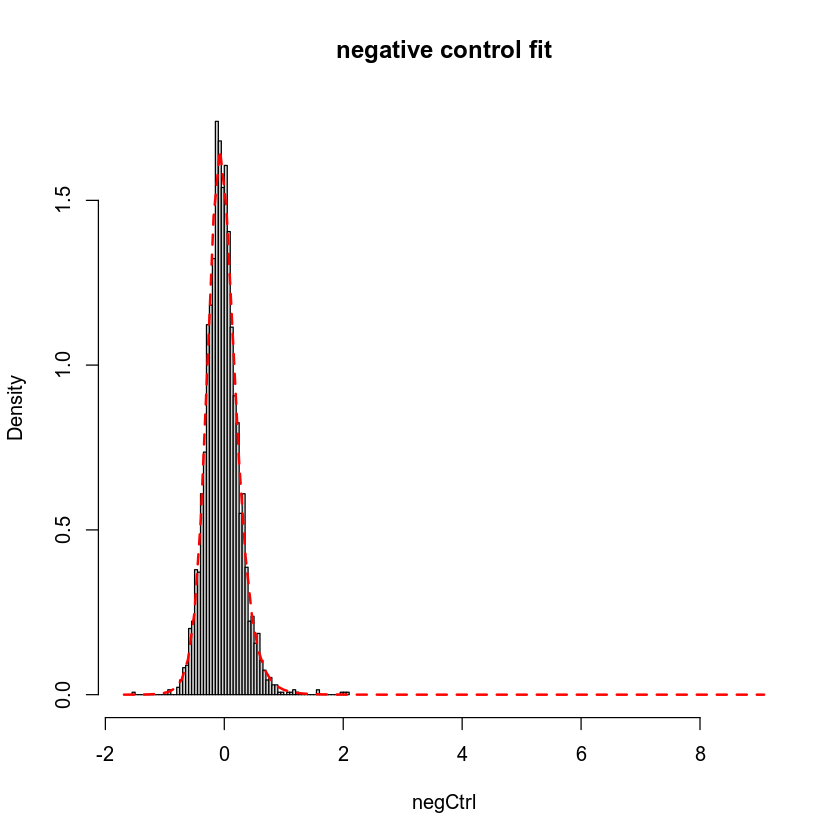

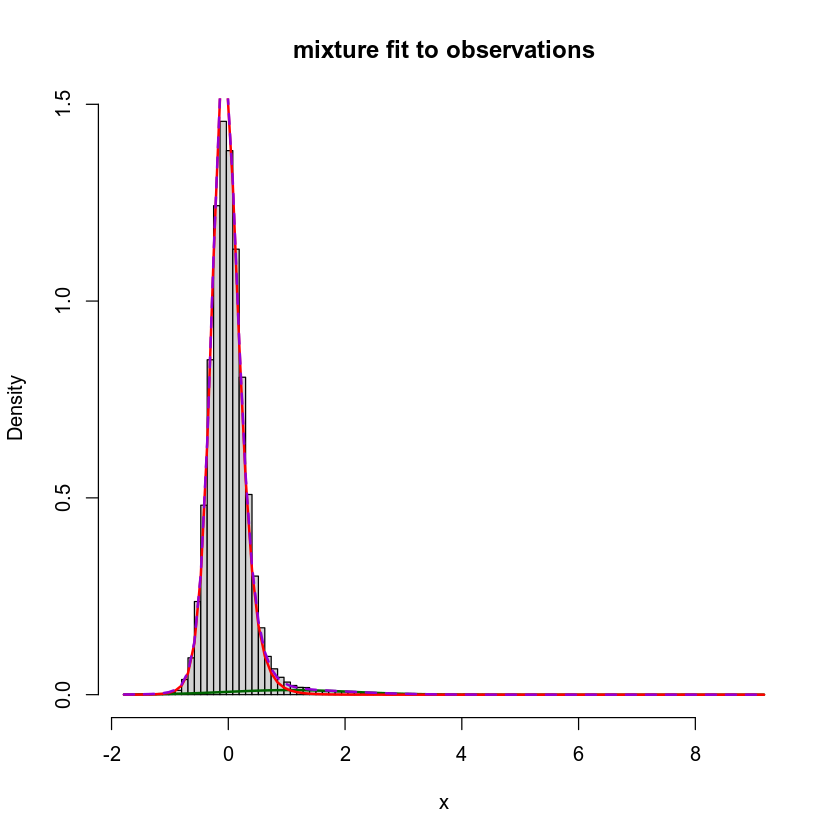

In [26]:
l2fc_dz.CRISPhieRmix <- CRISPhieRmix(x = x, geneIds = geneIds, negCtrl = negCtrl,
                                     VERBOSE = TRUE, PLOT = TRUE)

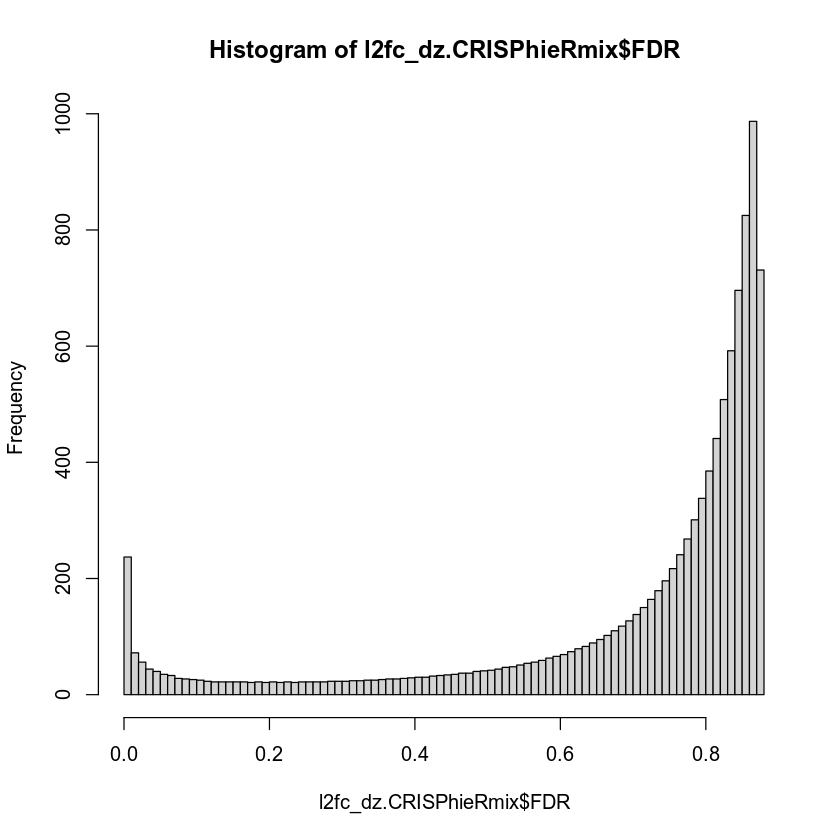

In [27]:
hist(l2fc_dz.CRISPhieRmix$FDR, breaks = 100)

In [28]:
sum(l2fc_dz.CRISPhieRmix$FDR < 0.1)

[1] 598

In [29]:
sum(l2fc_dz.CRISPhieRmix$FDR < 0.05)

[1] 449

In [30]:
scores_dz <- data.frame(groups = l2fc_dz.CRISPhieRmix$genes, FDR = l2fc_dz.CRISPhieRmix$FDR)
head(scores_dz[order(scores_dz$FDR, decreasing = FALSE), ], 10)

,groups,FDR
,<chr>,<dbl>
250,"[CTD-2270L9.4-002, CTD-2270L9.4-001, CTD-2270L9.4-003];;;NC_000016.10:+:23452748;;;experimental;;;promoter_overlap;;;6",0.000000e+00
328,"[FOXD3-AS1-002, FOXD3-AS1-003];;;NC_000001.11:-:63322446;;;experimental;;;promoter_overlap;;;7",0.000000e+00
402,"[LAMTOR5-AS1-022, LAMTOR5-AS1-006, LAMTOR5-AS1-020, LAMTOR5-AS1-014, LAMTOR5-AS1-023, LAMTOR5-AS1-031];;;NC_000001.11:+:110407783;;;experimental;;;promoter_overlap;;;9",0.000000e+00
1750,AC068831.3-001;;;NC_000015.10:-:90935157;;;experimental;;;promoter_overlap;;;8,0.000000e+00
3506,EOMES-001;;;NC_000003.12:-:27722322;;;control;;;protein_coding;;;8,0.000000e+00
3613,FOXA2-002;;;NC_000020.11:-:22584571;;;control;;;protein_coding;;;10,0.000000e+00
4489,LINC01424-001;;;NC_000021.9:+:44801879;;;experimental;;;promoter_overlap;;;9,0.000000e+00
4958,PITPNA-AS1-001;;;NC_000017.11:+:1516924;;;experimental;;;promoter_overlap;;;9,0.000000e+00
5560,RP11-121L10.2-001;;;NC_000011.10:+:90223166;;;experimental;;;promoter_overlap;;;8,0.000000e+00


In [31]:
sig_dz <- scores_dz[which(scores_dz$FDR < 0.1), ]
nrow(sig_dz)

[1] 598

In [32]:
sig_dz[grep("control", sig_dz$groups), ]

,groups,FDR
,<chr>,<dbl>
3506,EOMES-001;;;NC_000003.12:-:27722322;;;control;;;protein_coding;;;8,0.000000e+00
3507,EOMES-004;;;NC_000003.12:-:27722707;;;control;;;protein_coding;;;7,4.234045e-05
3509,EPCAM-001;;;NC_000002.12:+:47369211;;;control;;;protein_coding;;;9,7.089883e-02
3613,FOXA2-002;;;NC_000020.11:-:22584571;;;control;;;protein_coding;;;10,0.000000e+00
3652,GATA4-001;;;NC_000008.11:+:11704204;;;control;;;protein_coding;;;8,1.615812e-03
3705,GSC-001;;;NC_000014.9:-:94770237;;;control;;;protein_coding;;;6,3.952268e-06
3749,HHEX-001;;;NC_000010.11:+:92689954;;;control;;;protein_coding;;;7,3.434829e-04
4798,MIXL1-001;;;NC_000001.11:+:226223663;;;control;;;protein_coding;;;9,1.410607e-02
10107,SOX17-001;;;NC_000008.11:+:54457934;;;control;;;protein_coding;;;7,2.818258e-16


In [33]:
scores_dz[grep("DIGIT", scores_dz$groups), ]

,groups,FDR
,<chr>,<dbl>
3436,DIGIT;;;NC_000014.9:+:94770641;;;experimental;;;promoter_overlap;;;6,0.641542


In [34]:
nrow(scores_dz)

[1] 10480

In [35]:
write.table(scores_dz, file = "../../../data/02__screen/02__enrichment_data/CRISPhieRmix_dz.with_batch.txt", 
            quote = FALSE, sep = "\t", row.names = FALSE)